# Análise descritiva para resposta contínua - parte 2

Considere a mesma base de dados utilizada na parte 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis **qualitativas** (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [4]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Carregando DataFrame

df_raw = pd.read_csv('previsao_de_renda.csv')
df_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [7]:
# Separando as variáveis de interesse

df = df_raw[['posse_de_veiculo', 'posse_de_imovel', 'renda']]
df.head()

,posse_de_veiculo,posse_de_imovel,renda
0,False,True,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,True,False,7246.69
4,False,False,4017.37


In [8]:
# Groupby para uma analise da renda média e posse de veículo

posse_veiculo = df.groupby('posse_de_veiculo')['renda'].agg(['mean', 'count'])
posse_veiculo

,mean,count
posse_de_veiculo,,
False,4390.506963,9167
True,4992.579609,5833


Utilizando o método groupby pode-se notar que não há uma discrepância significativa no valor da renda média dos indivíduos que possuem veículo para os que não possuem.

In [10]:
# Groupby para uma analise da renda média e posse de imóvel

posse_imovel = df.groupby('posse_de_imovel')['renda'].agg(['mean', 'count'])
posse_imovel

,mean,count
posse_de_imovel,,
False,4426.970482,4918
True,4721.052704,10082


Novamente, pelo método groupby, não é possível notar uma discrepância significativa no valor médio da renda entre as pessoas que possuem e que não possuem imóveis. 

Text(0.5, 1.0, '"Zoom"')

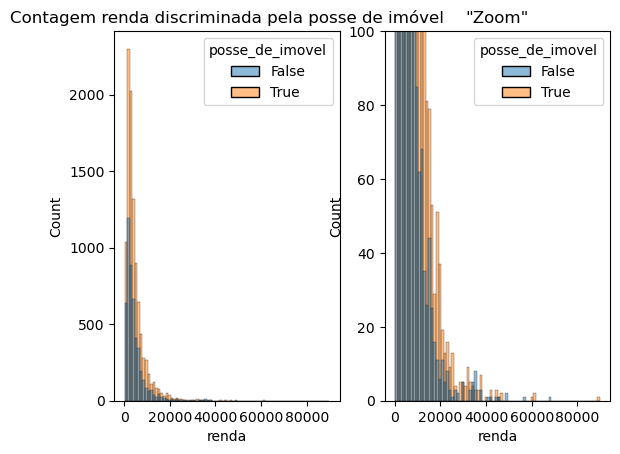

In [12]:
# Analisando a contagem da renda (em relação a posse de imóvel)

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=[15,6])

ax1 = sns.histplot(
        ax = axes[0],
        data=df, 
        x='renda', 
        hue='posse_de_imovel',
        bins=80,
        # kde=True
)
ax1.set_title('Contagem renda discriminada pela posse de imóvel')

ax2 = sns.histplot(
        ax = axes[1],
        data=df, 
        x='renda', 
        hue='posse_de_imovel',
        bins=80,
        # kde=True
)
ax2.set(ylim=(0, 100))
ax2.set_title('"Zoom"')

Os gráficos gerados não indicam que a `posse_de_imovel` seja uma boa variável para predizer a `renda`. Os indivíduos, com valores baixos ou altos de renda, aparentemente tendem a optar por possuir um imóvel. O zoom, na figura da direita, deixa claro que parece não haver uma predominância da  `posse_de_imovel` para uma faixa específica de renda, o que muda é o número de pessoas conforme a valor da renda aumenta. 

Text(0.5, 1.0, '"Zoom"')

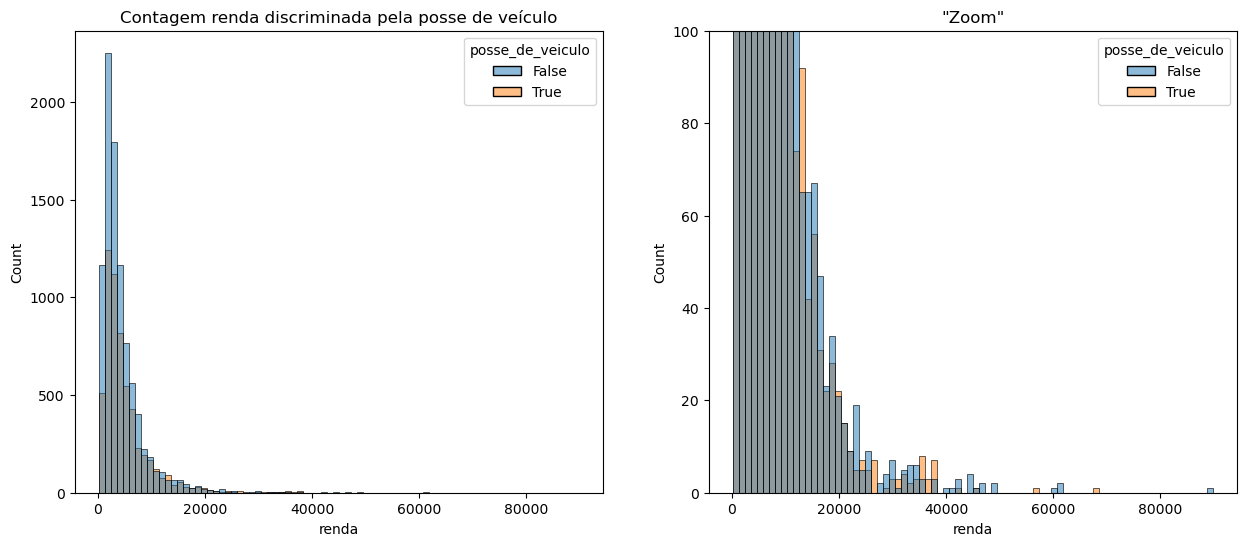

In [14]:
# Analisando a contagem da renda (em relação a posse de veículo)

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=[15,6])

ax1 = sns.histplot(
        ax = axes[0],
        data=df, 
        x='renda',
        hue='posse_de_veiculo',
        bins=80,
)
ax1.set_title('Contagem renda discriminada pela posse de veículo')

ax2 = sns.histplot(
        ax=axes[1],
        data=df,
        x='renda',
        hue='posse_de_veiculo',
        bins=80
)
ax2.set(ylim=(0,100))
ax2.set_title('"Zoom"')

Um comportamento semelhante ao da variável `posse_de_imovel` se repete para `posse_de_veiculo`, mas aqui os indivíduos têm uma tendência a não possuir veículos e, estranhamente, esse comportamento parece se replicar em praticamente toda a faixa de `renda`. Dessa forma, a variável `posse_de_veiculo` também não é uma boa variável para predizer a `renda` dos indivíduos. 

Text(0.5, 1.0, 'Posse de imóvel x Renda')

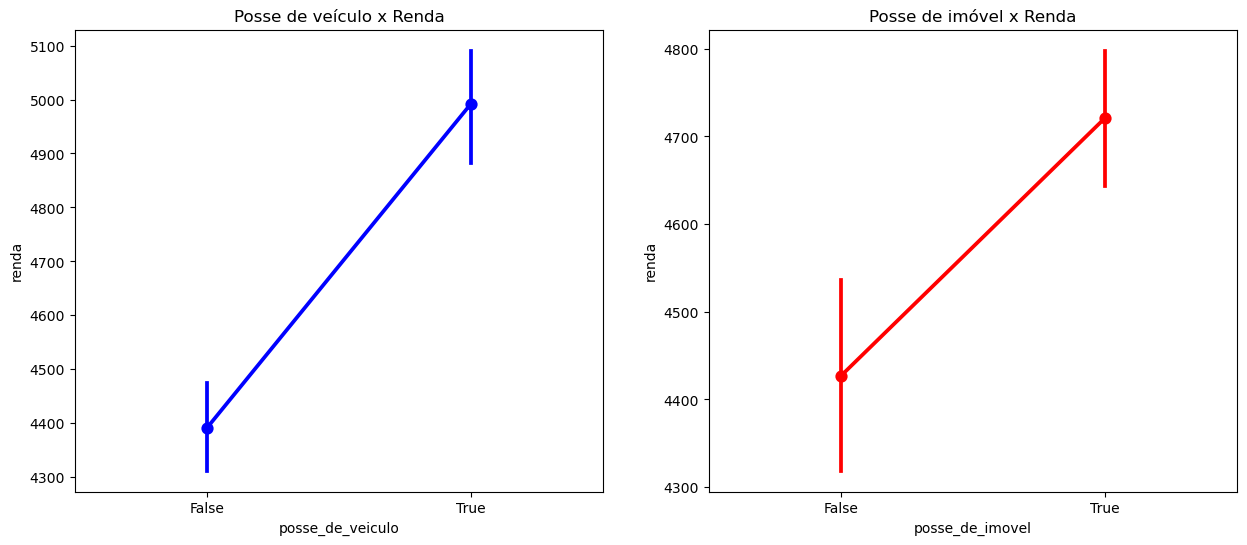

In [16]:
# Gerando um gráfico .pointplot

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=[15,8])

ax = sns.pointplot(
    x='posse_de_veiculo',
    y='renda',
    data=df,
    dodge=True,
    errorbar=('ci',90),
    ax=axes[0],
    color='blue'
)
ax.set_title('Posse de veículo x Renda')

ax2 = sns.pointplot(
    x='posse_de_imovel',
    y='renda',
    data=df,
    dodge=True,
    errorbar=('ci',90),
    ax=axes[1],
    color='red'
)
ax2.set_title('Posse de imóvel x Renda')

Comparando o *pointplot* da variável `posse_de_veiculo` e `posse_de_imovel`, é possível perceber que parece que há uma diferença entre tais variáveis. A primeira delas parece ser um indicador melhor para predizer a renda, uma vez que há possuir veículo está associado a uma maior média de renda. A segunda, por sua vez, tem um valor médio de renda menor em relação a quem possui um imóvel. 

É válido destacar que não há uma diferença significativa entre as duas variáveis (`posse_de_veiculo` e `posse_de_imovel`) para esse conjunto de dados, ou seja, ambas provavelmente não são as melhores variáveis para predição de renda dos indivíduos.


# Insights finais

Com base nas análises, pode-se afirmar qui:
- O número de indivíduos que opta por possuir um imóvel é maior que o número que opta por possuir um veículo, como pode ser visto a partir da análise do `groupby`. Tal comportamento parece se replicar para toda a faixa de renda, como evidenciado pelos `histplots`.
- Apesar de a variável `posse_de_veiculo` ser um pouco melhor para predizer a renda, não há diferenças significativas entre ela e a variável `posse_de_imovel`. Dessa forma, ambas as variáveis não parecem compor o melhor conjunto para se fazer predições de renda.